In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
def add_square(img, center, width):
  start_point = (center[0]-width, center[1]-width)
  end_point   = (center[0]+width, center[1]+width)
  cv2.rectangle(img, start_point, end_point, random_color(),cv2.FILLED)

# %%
def create_data_sample(num_shapes, height, width):
  img = np.zeros((height, width, 3))
  label = np.zeros((height, width, 1))
  for _ in range(num_shapes):
    x = int(np.random.rand()*width)
    y = int(np.random.rand()*height)
    if np.random.rand() > 0.9:
      cv2.circle(img, (x,y), int(np.ceil(width*0.05)), random_color(), cv2.FILLED)
      cv2.circle(label, (x,y), int(np.ceil(width*0.02)), (1,1,1), cv2.FILLED)
    # else: 
    #   add_square(img, (x,y), int(np.ceil(width*0.05*0.7)))
  return img, label


# %%
def test_batch(num_shapes, height, width):
  img, label = create_data_sample(num_shapes, height, width)
  return np.expand_dims(img,0), np.expand_dims(label,0)

# %%
def grayscale_image(img):
  return np.expand_dims((img[:,:,0] + img[:,:,1] + img[:,:,2])/3,2)

# %%
# (128,128,1) --> (128,128,3)
def to_three_channels(img):
  return np.squeeze(np.stack((img,img,img), 2))

# %%
def random_color():
  return np.random.rand(3)

# %%
def show_sample(img, label):
  figure, axis = plt.subplots(1,2)
  axis[0].imshow(img)
  axis[1].imshow(to_three_channels(label))

# %%
def show_batch(img, label):
  show_sample(img[0,:,:,:],label[0,:,:,:])

In [7]:
def loss_function(y_true, y_pred):
  squared_diff = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_diff)

In [8]:
model = keras.models.load_model('myModel.h5',custom_objects={'loss_function':loss_function})




0.31036776


In [13]:
img, label = test_batch(10, 128, 128)

y_pred = model.predict(img)
print(y_pred.max())
# show_batch(img, y_pred)

1.7870884


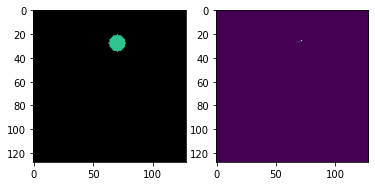

In [14]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(y_pred[0,:,:,:])
plt.show()